# Lesson 3 : Deep learning with Pytorch

Link to the colab here : https://colab.research.google.com/drive/17H8XUUvFTSPQnRyP_evpMtVylEASnQHD

In [0]:
import torch

In [115]:
# Basic operations
x = torch.tensor([[1,2,3],[4,5,6]],dtype = torch.float)
print(x)

z = x**2
print(z)

y = z.mean()
print(y)

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[ 1.,  4.,  9.],
        [16., 25., 36.]])
tensor(15.1667)


In [116]:
# Gradient tracking
x = torch.tensor([[1,2,3],[4,5,6]],dtype = torch.float,requires_grad = True)
print(x)

z = x**2
print(z)

y = z.mean()
print(y)

tensor([[1., 2., 3.],
        [4., 5., 6.]], requires_grad=True)
tensor([[ 1.,  4.,  9.],
        [16., 25., 36.]], grad_fn=<PowBackward0>)
tensor(15.1667, grad_fn=<MeanBackward0>)


In [0]:
y.backward()

In [118]:
print(x,z,y)

tensor([[1., 2., 3.],
        [4., 5., 6.]], requires_grad=True) tensor([[ 1.,  4.,  9.],
        [16., 25., 36.]], grad_fn=<PowBackward0>) tensor(15.1667, grad_fn=<MeanBackward0>)


In [119]:
print(y.grad)
print(z.grad)
print(x.grad)

None
None
tensor([[0.3333, 0.6667, 1.0000],
        [1.3333, 1.6667, 2.0000]])


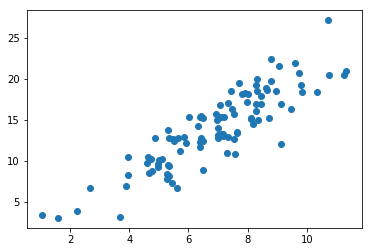

In [120]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# First we sample x
mu_x = 7
scale_x = 2
n = 100
x = np.random.normal(loc = mu_x,scale = scale_x,size = n)

# Then we sample y
scale_y = 2
y = np.random.normal(loc = x * 2,scale = scale_y)

# Finally we plot the points
plt.scatter(x,y)

In [121]:
x = torch.tensor(x, dtype = torch.float)
y = torch.tensor(y, dtype = torch.float)

print(x,y)

tensor([ 7.6322, 11.3367,  6.9888,  7.0880,  5.1151,  5.3209,  5.3412, 10.7311,
         8.0998,  6.5057,  7.8106,  6.4897,  9.4516,  3.8831,  9.8181,  6.3401,
         5.4736,  8.1210,  5.0063,  5.2828,  5.3352,  3.9455,  6.3893,  7.1807,
         1.5777,  8.2883,  8.1787,  8.4431,  6.4142,  4.7527,  6.4792,  7.5376,
         7.4371,  6.9722,  7.2876,  6.3879,  6.4309,  4.8848,  8.6395,  8.7260,
         9.0641,  7.5893,  1.0646,  5.2896,  2.6657,  5.5244,  7.4712,  9.8551,
         6.9889, 11.2739,  7.5513,  8.9571,  8.4613,  7.0115,  7.0839, 10.7365,
         5.9173,  9.6043,  5.5972,  4.6469,  5.4496,  8.3230,  3.7026,  7.3460,
         8.2764,  8.0083,  4.9639,  4.6043,  7.6439,  8.2782,  9.1340,  8.6405,
         4.6650,  5.8561,  5.6396,  6.9392,  8.3400, 10.3323,  4.9604,  5.3602,
         4.7356,  7.0903,  6.4098,  7.3339,  7.9923,  7.9083,  6.0101,  8.7995,
         5.7021,  2.2412,  6.3911,  7.2036,  9.7465,  8.7756,  5.3011,  3.9516,
         7.7079,  8.3279,  7.1726,  9.12

In [0]:
a = torch.tensor([1.], dtype = torch.float,requires_grad=True)
a.retain_grad()
b = torch.tensor([0.], dtype = torch.float,requires_grad=True)
b.retain_grad()

In [0]:
x = x.unsqueeze(-1)

In [0]:
pred = x @ a + b

In [0]:
criterion = nn.MSELoss()
loss = criterion(pred,y)

In [0]:
loss.backward()

In [0]:
alpha = 0.001
a = a - alpha * a.grad
b = b - alpha * b.grad

In [128]:
n_epochs = 100
alpha = 0.001

a = Variable(torch.tensor([1.], dtype = torch.float),requires_grad=True)
b = Variable(torch.tensor([0.], dtype = torch.float),requires_grad=True)

for i in range(n_epochs):
  pred = x @ a + b
  loss = criterion(pred,y)
  
  loss.backward()
  
  a = a - alpha * a.grad
  b = b - alpha * b.grad
  
  a = torch.tensor(a.detach(),requires_grad= True)
  b = torch.tensor(b.detach(),requires_grad= True)
  
  if i % 10 == 0:
    print(f"Loss at epoch {i} : {loss}")

Loss at epoch 0 : 58.58003616333008
Loss at epoch 10 : 10.666964530944824
Loss at epoch 20 : 5.459080219268799
Loss at epoch 30 : 4.893007755279541
Loss at epoch 40 : 4.831470966339111
Loss at epoch 50 : 4.824775695800781
Loss at epoch 60 : 4.824039936065674
Loss at epoch 70 : 4.823953628540039
Loss at epoch 80 : 4.82393741607666
Loss at epoch 90 : 4.823928356170654


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


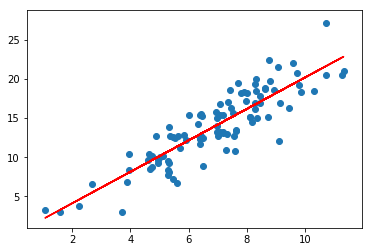

In [129]:
x = x.numpy()
pred = pred.detach().numpy()

plt.plot(x,pred, c= "r")
plt.scatter(x,y)

In [0]:
x = np.array([[0,0],
                [0,1],
                [1,0],
                [1,1]])
y = np.array([0,1,1,0])


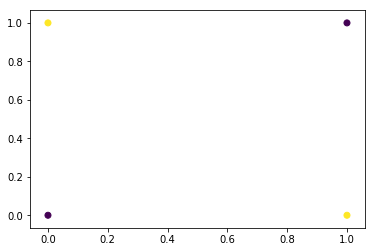

In [209]:
plt.scatter(x[:,0],x[:,1], c= y)

In [0]:
x = torch.tensor(x, dtype = torch.float)
y = torch.tensor(y)

In [0]:
w = torch.tensor([[1.,0.],
                  [0.,1.]], dtype = torch.float,requires_grad=True)
b = torch.tensor([0.,0.], dtype = torch.float,requires_grad = True)
pred = torch.softmax(x @ w + b,dim = 1)


In [0]:
loss = -torch.log(pred[range(y.shape[0]), y]).mean()

In [191]:
n_epochs = 100
alpha = 0.001

w = torch.tensor([[1.,0.],
                  [0.,1.]], dtype = torch.float,requires_grad=True)
b = torch.tensor([0.,0.], dtype = torch.float,requires_grad = True)

for i in range(n_epochs):
  pred = torch.softmax(x @ w + b,dim = 1)
  loss = -torch.log(pred[range(y.shape[0]), y]).mean()
  
  loss.backward()
  
  w = w - alpha * w.grad
  b = b - alpha * b.grad
  
  w = torch.tensor(w.detach(),requires_grad= True)
  b = torch.tensor(b.detach(),requires_grad= True)
  
  if i % 10 == 0:
    print(f"Loss at epoch {i} : {loss}")

Loss at epoch 0 : 0.7532044053077698
Loss at epoch 10 : 0.7530710697174072
Loss at epoch 20 : 0.752937912940979
Loss at epoch 30 : 0.7528051733970642
Loss at epoch 40 : 0.7526726126670837
Loss at epoch 50 : 0.7525403499603271
Loss at epoch 60 : 0.7524082660675049
Loss at epoch 70 : 0.7522764801979065
Loss at epoch 80 : 0.752144992351532
Loss at epoch 90 : 0.7520138025283813


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [0]:
pred = pred.max(dim = 1).indices
pred = pred.detach().numpy()
x = x.numpy()

plt.scatter(x[:,0],x[:,1], c= pred)

In [196]:
x = torch.tensor(x, dtype = torch.float)
y = torch.tensor(y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [0]:
W1 = torch.tensor([[1.,0.],
                  [0.,1.]], dtype = torch.float,requires_grad=True)
b1 = torch.tensor([0.,0.], dtype = torch.float,requires_grad = True)
a2 = torch.relu(x @ W1 + b1)


In [0]:
W2 = torch.tensor([[1.,0.],
                  [0.,1.]], dtype = torch.float,requires_grad=True)
b2 = torch.tensor([0.,0.], dtype = torch.float,requires_grad = True)


In [0]:
x = np.array([[0,0],
                [0,1],
                [1,0],
                [1,1]])
y = np.array([0,1,1,0])
x = torch.tensor(x, dtype = torch.float)
y = torch.tensor(y)

In [249]:
n_epochs = 10000
alpha = 0.1

W1 = torch.tensor([[1.,1.],
                  [1.,1.]], dtype = torch.float,requires_grad=True)
b1 = torch.tensor([0.,-1.], dtype = torch.float,requires_grad = True)

W2 = torch.tensor([[1.,0.],
                  [0.,1.]], dtype = torch.float,requires_grad=True)
b2 = torch.tensor([1.,-2.], dtype = torch.float,requires_grad = True)

for i in range(n_epochs):
  a2 = torch.sigmoid(x @ W1 + b1)
  pred = torch.softmax(a2 @ W2 + b2,dim = 1)
  loss = -torch.log(pred[range(y.shape[0]), y]).mean()
  
  loss.backward()
  
  W1 = W1 - alpha * W1.grad
  b1 = b1 - alpha * b1.grad
  
  W2 = W2 - alpha * W2.grad
  b2 = b2 - alpha * b2.grad
  
  W1 = torch.tensor(W1.detach(),requires_grad= True)
  b1 = torch.tensor(b1.detach(),requires_grad= True)
  
  W2 = torch.tensor(W2.detach(),requires_grad= True)
  b2 = torch.tensor(b2.detach(),requires_grad= True)
  
  if i % 1000 == 0:
    print(f"Loss at epoch {i} : {loss}")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(Tru

Loss at epoch 0 : 1.6550880670547485
Loss at epoch 1000 : 0.525742769241333
Loss at epoch 2000 : 0.15584434568881989
Loss at epoch 3000 : 0.0495070144534111
Loss at epoch 4000 : 0.027080858126282692
Loss at epoch 5000 : 0.01826372556388378
Loss at epoch 6000 : 0.01366490125656128
Loss at epoch 7000 : 0.010870032012462616
Loss at epoch 8000 : 0.009001675061881542
Loss at epoch 9000 : 0.0076690055429935455


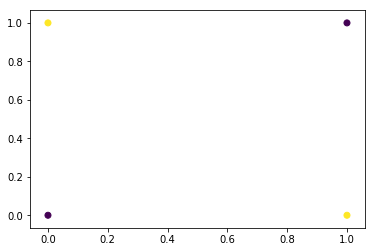

In [250]:
pred = pred.max(dim = 1).indices
pred = pred.detach().numpy()
x = x.numpy()

plt.scatter(x[:,0],x[:,1], c= pred)